# Data Representation for Neural Networks

Tensors are **Multi-Dimensional Numpy Arrays** 

At it's core, a tensor is a container for data - almost always numerical data. So it's a container for numbers. 
Tensors are a **generalization** of matrices to an **arbitrary number of dimensions**. 

### 3 Key attributes

* **Rank**, i.e. Number of Axis: E.g. a 3D tensor has three axis, a matrix 2. This is also called the tensor's _ndim_ in python libraries such as numpy. In the context of tensors, 
  * _dimensions_ are often called _axes_. However it's more convenient to refer to a vectors **rank** so that you do not confuse it with the dimensions of a vetor (i.e. the number of antries _along an axis_). See below for tensors of different ranks.
* **Shape**: A tuple of integers that describes how many dimensions the tensor has along each axis.
* **Data type**: Ususally called _dtype_ in Python can be float32, float64, uint8. Not so much char.


### Tensor Ranks

1. 0D - Scalars: A tensor that **contains only one number** is called a scalar / scalar tensor / 0-dimensional tensor / 0D tensor
2. 1D - Vectors: An **array of numbers** is called a vector or 1D Tensor with exactly 1 axis.
3. 2D - Matrices: An **array of vectors** is called a matrix. You can visually think of a rectangular grid with rows and columns. 
4. 3D and higher dimensional tensors: An **array of matrices** which you can interpret as a cube of numbers, thus 3D. By packing 3D tensors in an array you'll get a 4D tensor and so on.... 

In [12]:
import numpy as np

# 0D Tensor: Scalar
x = np.array(12)
print("Example of a Scalar tensor with a rank of", x.ndim, ", shape of", x.shape, "and datatype", x.dtype , "\n0D Tensor:", x, "\n-------\n")

# 1D Tensor: Vector
x = np.array([12, 3, 6, 14])
print("Example of a Vector tensor with a rank of", x.ndim, ", shape of", x.shape, "and datatype", x.dtype , "\n1D Tensor:", x, "\n-------\n")

# 2D Tensor: Matrix
x = np.arange(12).reshape((3, 4))
print("Example of a Matrix tensor with a rank of", x.ndim, ", shape of", x.shape, "and datatype", x.dtype , "\n2D Tensor:\n", x, "\n-------\n")

# 3D Tensor
x = np.arange(36).reshape((3, 3, 4))
print("Example of a 3D tensor with a rank of", x.ndim, ", shape of", x.shape, "and datatype", x.dtype , "\n3D Tensor:\n", x, "\n-------\n")

Example of a Scalar tensor with a rank of 0 , shape of () and datatype int64 
0D Tensor: 12 
-------

Example of a Vector tensor with a rank of 1 , shape of (4,) and datatype int64 
1D Tensor: [12  3  6 14] 
-------

Example of a Matrix tensor with a rank of 2 , shape of (3, 4) and datatype int64 
2D Tensor:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] 
-------

Example of a 3D tensor with a rank of 3 , shape of (3, 3, 4) and datatype int64 
3D Tensor:
 [[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]

 [[24 25 26 27]
  [28 29 30 31]
  [32 33 34 35]]] 
-------



To make this more concrete, let's look at the MNIST dataset. 

In [13]:
from keras.datasets import mnist

In [14]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Next we display the number of axes of the tensor train_images
print("Number of axes of the tensor _train_images_:", train_images.ndim)
print("Shape of the tensor _train_images_:", train_images.shape)
print("Datatype of the tensor _train_images_:", train_images.dtype)
print("This is a 3D tensor of 8bit integers. More precisely its an array of 60k matrices of 28x28 integers. Each such matrix is a grayscale image, with coefficients between 0 and 255.")

Number of axes of the tensor _train_images_: 3
Shape of the tensor _train_images_: (60000, 28, 28)
Datatype of the tensor _train_images_: uint8
This is a 3D tensor of 8bit integers. More precisely its an array of 60k matrices of 28x28 integers. Each such matrix is a grayscale image, with coefficients between 0 and 255.


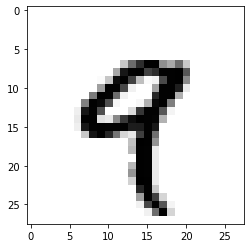

In [15]:
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Input images are stored in numpy tensors, which are formattet as float32 tensors
of shape (60000, 784) and (100000, 784)

In [18]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

* Our network consinsts of a chain of two Dense layers.
* Each layer applies a few simple tensor operations to the input data involving weight tensors.
* Wheight tensors are attributes of of the layers, i.e. where the knowledge of the network exists.



In [19]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

# Network compilation step
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

* The categorical_crossentropy is the loss function that's used as a feedback signal for learning the weight tensors
* This function is used in the trianing phase to minimize the loss
* The reduction of the loss happens via minibatch stochastic gradient descent.
* The exact rules governing a specific use of gradient descent are defined by the rmsprop optimizer passed as the first argument. 

In [22]:
network.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Training loop
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5


ValueError: in user code:

    /Users/fred/.pyenv/versions/3.8.5/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /Users/fred/.pyenv/versions/3.8.5/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/fred/.pyenv/versions/3.8.5/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/fred/.pyenv/versions/3.8.5/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/fred/.pyenv/versions/3.8.5/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/fred/.pyenv/versions/3.8.5/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /Users/fred/.pyenv/versions/3.8.5/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:755 train_step
        loss = self.compiled_loss(
    /Users/fred/.pyenv/versions/3.8.5/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /Users/fred/.pyenv/versions/3.8.5/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    /Users/fred/.pyenv/versions/3.8.5/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /Users/fred/.pyenv/versions/3.8.5/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /Users/fred/.pyenv/versions/3.8.5/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:1537 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    /Users/fred/.pyenv/versions/3.8.5/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /Users/fred/.pyenv/versions/3.8.5/lib/python3.8/site-packages/tensorflow/python/keras/backend.py:4833 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /Users/fred/.pyenv/versions/3.8.5/lib/python3.8/site-packages/tensorflow/python/framework/tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 10) are incompatible
